# Understanding and Cleaning Data

In [19]:
import pandas as pd
train = pd.read_csv('C:\\Users\\HP\\Step - i Internship\\Machine Learning\\1. Linear Regression Task\\train_ctc.csv',
                   skiprows = 2)
train.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [20]:
train.dtypes

S.No.                    int64
College                 object
Role                    object
City type               object
Previous CTC            object
Previous job changes     int64
Graduation marks         int64
Exp (Months)             int64
CTC                     object
dtype: object

In [21]:
train['Previous CTC'] = train['Previous CTC'].str.replace(',', '')
train['Previous CTC'] = train['Previous CTC'].astype(float)
train.dtypes

S.No.                     int64
College                  object
Role                     object
City type                object
Previous CTC            float64
Previous job changes      int64
Graduation marks          int64
Exp (Months)              int64
CTC                      object
dtype: object

In [22]:
train['CTC'] = train['CTC'].str.replace(',','')
train['CTC'] = train['CTC'].astype(float)
train.dtypes

S.No.                     int64
College                  object
Role                     object
City type                object
Previous CTC            float64
Previous job changes      int64
Graduation marks          int64
Exp (Months)              int64
CTC                     float64
dtype: object

In [23]:
train.drop('S.No.', inplace=True, axis=1)
train.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10


In [24]:
import numpy as np

train['College_T1'] = np.where(train['College'] == 'Tier 1', 1, 0)
train['College_T2'] = np.where(train['College'] == 'Tier 2', 1, 0)
train.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_T1,College_T2
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58,1,0
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87,0,1
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02,0,1
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39,0,0
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10,0,0


In [25]:
train['City_Metro'] = np.where(train['City type'] == 'Metro', 1, 0)
train.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_T1,College_T2,City_Metro
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58,1,0,0
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87,0,1,1
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02,0,1,1
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39,0,0,1
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10,0,0,1


In [26]:
train['Role_Manager'] = np.where(train['Role'] == 'Manager', 1, 0)
train.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_T1,College_T2,City_Metro,Role_Manager
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58,1,0,0,1
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87,0,1,1,0
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02,0,1,1,0
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39,0,0,1,0
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10,0,0,1,0


In [27]:
train.corr()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_T1,College_T2,City_Metro,Role_Manager
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260,-0.090043,0.232138,0.036956,0.021208
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518,0.037294,0.008599,-0.001568,-0.013131
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557,0.015750,0.010571,0.018550,0.014541
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569,0.010716,-0.011642,-0.020856,-0.025019
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000,0.165249,-0.041814,0.211258,0.625435
College_T1,-0.090043,0.037294,0.015750,0.010716,0.165249,1.000000,-0.593313,-0.005669,-0.029292
College_T2,0.232138,0.008599,0.010571,-0.011642,-0.041814,-0.593313,1.000000,0.017117,0.068498
City_Metro,0.036956,-0.001568,0.018550,-0.020856,0.211258,-0.005669,0.017117,1.000000,0.076185
Role_Manager,0.021208,-0.013131,0.014541,-0.025019,0.625435,-0.029292,0.068498,0.076185,1.000000


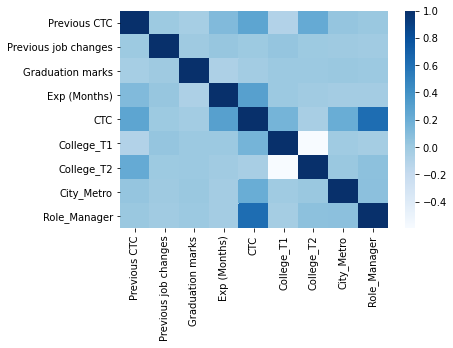

In [28]:
import seaborn as sns
sns.heatmap(train.corr(), cmap = 'Blues')

# Building Linear Regression Model

In [29]:
X_train = train[['Previous CTC', 'Previous job changes', 'Graduation marks',
          'Exp (Months)', 'College_T1', 'College_T2', 'City_Metro', 'Role_Manager']]
y_train = train['CTC']

In [30]:
from sklearn import linear_model

In [31]:
lr = linear_model.LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
lr.coef_

array([ 4.51593158e-01, -2.90411994e+01, -3.65235503e+00,  2.58940642e+02,
        4.65973155e+03, -8.32274437e+02,  4.08057730e+03,  1.93599437e+04])

In [34]:
lr.intercept_

32438.76239331255

# Predicting Test Data

In [35]:
test = pd.read_csv('C:\\Users\\HP\\Step - i Internship\\Machine Learning\\1. Linear Regression Task\\test_ctc.csv')

In [36]:
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
test.rename(columns = {'previous CTC' : 'Previous CTC',
            'previous job changes' : 'Previous job changes',
            'Exp' : 'Exp (Months)'}, inplace = True)
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,Previous CTC,Previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
X_test = test[['Previous CTC', 'Previous job changes', 'Graduation marks',
          'Exp (Months)', 'College_T1', 'College_T2', 'City_Metro', 'Role_Manager']]
y_test = test['Actual CTC']

In [39]:
predicted_ctc = lr.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error

sqr_e1 = mean_squared_error(test['Actual CTC'], predicted_ctc)
sqr_e1

61677937.04476763

In [41]:
from sklearn.metrics import mean_absolute_error

abs_e1 = mean_absolute_error(test['Actual CTC'], predicted_ctc)
abs_e1

6159.175550813307

In [42]:
from sklearn.metrics import r2_score

r_score1 = r2_score(test['Actual CTC'], predicted_ctc)
r_score1

0.6081873160460819